# 2-12. 와인 분류 프로젝트

## (1) 필요한 모듈 import하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## (2) 데이터 준비

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## (3) 데이터 이해하기

### Feature Data 지정하기

In [6]:
wine_data = wine.data
wine_data.shape

(178, 13)

### Label Data 지정하기

In [7]:
wine_label = wine.target
print(wine_label.shape)

(178,)


### Target Names 출력해 보기

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## (4) train, test 데이터 분리

In [11]:
# 데이터셋 나누기 - train/test(8:2)
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [12]:
X_train.shape

(142, 13)

In [13]:
X_test.shape

(36, 13)

## (5) 다양한 모델로 학습시켜보기 및 평가

### Decision Tree

In [14]:
# Decision Tree import하기
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 32)


# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [15]:
# 정확도
from sklearn.metrics import accuracy_score

print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.9444444444444444


### Grid Search - 하이퍼 파라미터 튜닝

In [16]:
# 1. 반복문 사용
depth_list = range(1, 30)

# 각각의 max_depth에  따른 train/test 정확도 저장할 리스트
train_acc_list = []
test_acc_list = []

In [17]:
for depth in depth_list:
    decision_tree = DecisionTreeClassifier(max_depth = depth, random_state = 32)
    decision_tree.fit(X_train, y_train)
    
    pred_train = decision_tree.predict(X_train)
    pred_test = decision_tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [18]:
import pandas as pd
result = pd.DataFrame(dict(max_depth = depth_list,
                          Train = train_acc_list,
                          Test = test_acc_list))
result

,max_depth,Train,Test
0,1,0.640845,0.666667
1,2,0.936620,0.861111
2,3,0.992958,0.944444
3,4,1.000000,0.944444
4,5,1.000000,0.944444
5,6,1.000000,0.944444
6,7,1.000000,0.944444
7,8,1.000000,0.944444
8,9,1.000000,0.944444
9,10,1.000000,0.944444


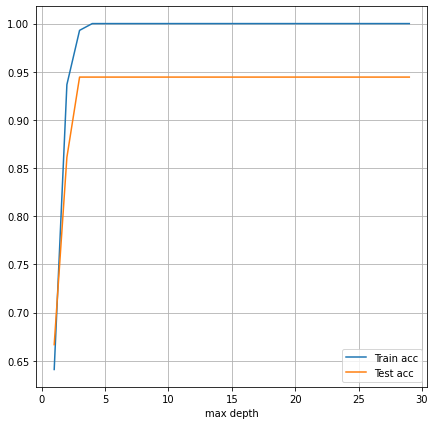

In [19]:
# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(depth_list, train_acc_list, label = 'Train acc')
plt.plot(depth_list, test_acc_list, label = 'Test acc')
plt.xlabel("max depth")
plt.grid(True)
plt.legend()
plt.show()

#### RandomizedSearchCV
- 주요 매개변수
    - estimator: 모델객체 지정
    - param_distributions : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - n_iter : 파라미터 검색 횟수
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환

In [20]:
from sklearn.model_selection import RandomizedSearchCV

decision_tree = DecisionTreeClassifier()

# 360개의 조합
param_grid = {
    'max_depth': range(1, 21),  # 20
    'max_leaf_nodes': range(2, 11),  # 9
    'criterion': ['gini', 'entropy'],  # 2
    'random_state': [1, 32]
}
n_iter = 50  # 확인할 조합의 개수. default: 10개
randomized_search = RandomizedSearchCV(decision_tree,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      scoring = "accuracy",
                                      cv = 3,
                                      n_jobs = -1)


In [21]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 21),
                                        'max_leaf_nodes': range(2, 11),
                                        'random_state': [1, 32]},
                   scoring='accuracy')

In [22]:
df = pd.DataFrame(randomized_search.cv_results_)
df.shape

(50, 15)

In [23]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001043,0.000019,0.000397,0.000007,32,4,5,gini,"{'random_state': 32, 'max_leaf_nodes': 4, 'max...",0.937500,0.872340,0.893617,0.901152,0.027130,30
1,0.001010,0.000033,0.000377,0.000020,1,3,3,gini,"{'random_state': 1, 'max_leaf_nodes': 3, 'max_...",0.895833,0.872340,0.872340,0.880171,0.011075,36
2,0.001069,0.000080,0.000322,0.000021,32,2,11,entropy,"{'random_state': 32, 'max_leaf_nodes': 2, 'max...",0.625000,0.595745,0.595745,0.605496,0.013791,40
3,0.001097,0.000026,0.000311,0.000011,32,7,11,entropy,"{'random_state': 32, 'max_leaf_nodes': 7, 'max...",0.895833,0.914894,0.893617,0.901448,0.009550,21
4,0.001056,0.000039,0.000316,0.000011,32,7,19,entropy,"{'random_state': 32, 'max_leaf_nodes': 7, 'max...",0.895833,0.914894,0.893617,0.901448,0.009550,21
5,0.001002,0.000017,0.000306,0.000009,32,2,17,entropy,"{'random_state': 32, 'max_leaf_nodes': 2, 'max...",0.625000,0.595745,0.595745,0.605496,0.013791,40
6,0.001059,0.000032,0.000294,0.000006,32,5,5,entropy,"{'random_state': 32, 'max_leaf_nodes': 5, 'max...",0.979167,0.872340,0.893617,0.915041,0.046168,6
7,0.001081,0.000027,0.000339,0.000050,1,8,6,entropy,"{'random_state': 1, 'max_leaf_nodes': 8, 'max_...",0.979167,0.914894,0.914894,0.936318,0.030299,1
8,0.001129,0.000193,0.000322,0.000004,1,2,3,entropy,"{'random_state': 1, 'max_leaf_nodes': 2, 'max_...",0.625000,0.595745,0.595745,0.605496,0.013791,40
9,0.001057,0.000031,0.000332,0.000013,1,4,9,entropy,"{'random_state': 1, 'max_leaf_nodes': 4, 'max_...",0.937500,0.872340,0.893617,0.901152,0.027130,30


In [24]:
randomized_search.best_params_

{'random_state': 1,
 'max_leaf_nodes': 8,
 'max_depth': 6,
 'criterion': 'entropy'}

In [25]:
randomized_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=8,
                       random_state=1)

#### 최적의 하이퍼 파라미터로 재학습

In [27]:
decision_tree = DecisionTreeClassifier(random_state = 1,
                                       max_leaf_nodes = 8,
                                       max_depth = 6,
                                       criterion = 'entropy')
# 모델 학습
decision_tree.fit(X_train, y_train)

# 모델 예측
pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



In [28]:
print("Train 정확도:", accuracy_score(y_train, pred_train))
print("Test 정확도:", accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.9166666666666666


#### 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ##### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ##### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ##### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ##### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ##### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

####   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [31]:
# 예측값, 실제값(Ground Truth)
# (pred_train, y_train), (pred_test, y_test)
# 전부 0으로 예측
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test))

Train confusion matrix
[[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]
--------------------------------------------------
Test confusion matrix
[[14  0  0]
 [ 0 14  0]
 [ 1  2  5]]


### Random Forest

In [32]:
# Random Forest import하기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 32)


# 모델 학습
rf.fit(X_train, y_train)

# 모델 예측
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# 평가
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM

In [33]:
# SVM import하기
from sklearn import svm
svm_model = svm.SVC(random_state = 32)


# 모델 학습
svm_model.fit(X_train, y_train)

# 모델 예측
y_pred = svm_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



### SGD Classifier

In [34]:
# SGD Classifier import하기
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state = 32)


# 모델 학습
sgd_model.fit(X_train, y_train)

# 모델 예측
y_pred = sgd_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       1.00      0.21      0.35        14
           2       0.35      1.00      0.52         8

    accuracy                           0.58        36
   macro avg       0.78      0.64      0.57        36
weighted avg       0.86      0.58      0.58        36



### Logistic Regression

In [35]:
# LogisticRegression import하기
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state = 32)


# 모델 학습
logistic_model.fit(X_train, y_train)

# 모델 예측
y_pred = logistic_model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (6) 모델 평가해 보기
- 1. 학습된 모델들의 테스트 데이터 예측 결과 어떻게 해석
- Test_data 기준
    - (accuracy) RandomForest(1.00) > LogisticRegression(0.97) > DecisionTree(0.92) > SVM(0.81) >   SGD Classifier(0.58) > 
    - (f1 score)  RandomForest(1.00) > LogisticRegression(0.97) > DecisionTree(0.91) > SVM(0.80) > >  SGD Classifier(0.58) >  
    - (Precision) RandomForest(1.00) > LogisticRegression(0.97) > DecisionTree(0.93) > SVM(0.80) >   SGD Classifier(0.86)
    - (Recall) RandomForest(1.00) > LogisticRegression(0.97) > DecisionTree(0.92) > SVM(0.81) >  SGD Classifier(0.58)

    
- 2. 모델 성능 평가하는 지표로 무엇이 좋은지 평가지표 중 적절한 것 선택 및 근거
 > 모든 평가지표에서 Random Forest가 가장 높은 점수이며 1.00의 결과가 나옴

### 보충. 모든 모델의 성능을 평가하는데 Classification Report 활용
- Decision Tree는 최적의 파라미터 탐색해 재학습 진행했으며 혼동행렬 활용
- 추후, RandomForest, SVM, Logistic Regression에 대한 그리드 서치 진행해 모델 간 성능 재비교